In [45]:
from operator import itemgetter
from mytool import uav_traffic_tool
from tests import dataload_example

import numpy as np
import matplotlib.pyplot as plt

tool = uav_traffic_tool.Wiz()

In [46]:
dataset_information={
    'day':'24Oct',
    'month':'10',
    'drone':'2',
    'time_period':'0900_0930',
    'road':'Panepistimiou',
    'intersection':'Panepistimiou-Omirou'
    }

nickname = f'Drone{dataset_information.get('drone')}_{dataset_information.get('day')}_{dataset_information.get('time_period')}'
file_path= fr'C:\Users\kpourg01\Desktop\Work\Code\pNEUMA\datasets\{dataset_information.get('road')}/2018{dataset_information.get('month')}{dataset_information.get('day')[:2]}_d{dataset_information.get('drone')}_{dataset_information.get('time_period')}.csv'

In [47]:
#sampling period must be integer multiple of 0.04
period_dataloading=0.2
time_decimals=1
#===========================================================================================
raw_data = dataload_example.get_info_pneuma(file_path=file_path, sampling_period=period_dataloading, time_decimals=time_decimals, position_smoothing=2)

In [48]:
period_flowcount=1
#----------------------------------------------------
start = min(min(set) for set in raw_data.get('time'))
end = max(max(set) for set in raw_data.get('time'))
time_axis = np.round(np.arange(start,end+period_flowcount,period_flowcount),decimals=time_decimals).tolist()
#----------------------------------------------------
wgs=True
#----------------------------------------------------
ll_lat,ll_lon = 37.97811671602297, 23.733975874806358
lr_lat,lr_lon = 37.97876143771719, 23.735210640421347
ur_lat,ur_lon = 37.97938790250702, 23.734674127747873
ul_lat,ul_lon = 37.97874587304865, 23.73345028699124
#----------------------------------------------------
bbox = [(ll_lat,ll_lon), 
        (lr_lat,lr_lon),
        (ur_lat,ur_lon),
        (ul_lat,ul_lon)]
#----------------------------------------------------
intersection_center=(37.97866950849114, 23.734362398006162)
#----------------------------------------------------
spatio_temporal_info =  {'wgs':wgs,'bbox':bbox,'intersection center':intersection_center,'time axis': time_axis}

In [49]:
dataloader = tool.dataloader(raw_data, spatio_temporal_info)
data = dataloader.get_filtered_data(cursed_ids=[208,1442,75,2450,140,1151,1469,628,2941,154,917,614,682,326,1246,1281,1817,2021,1659,2480,2509])
analysis = tool.analysis(data,spatio_temporal_info)
visualization = tool.visualization(data,spatio_temporal_info)

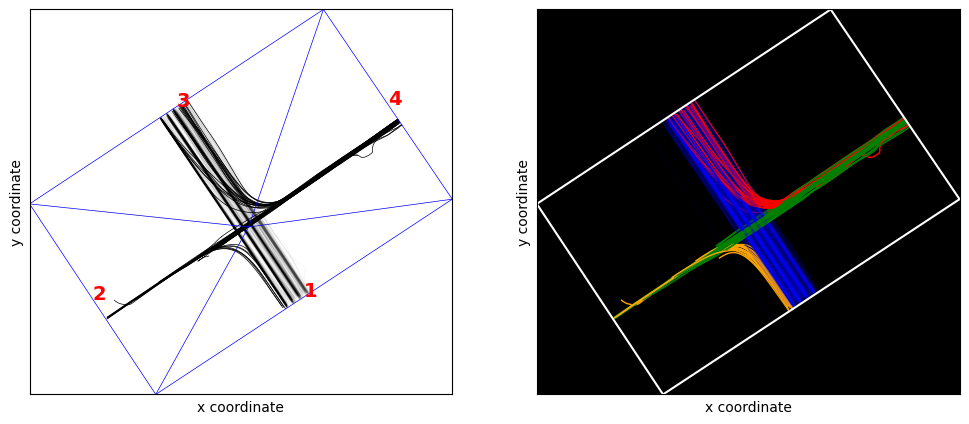

In [50]:
od_pairs = analysis.get_od_pairs()
valid_od_pairs = [(1,3),(1,2),(4,3),(4,2)]
visualization.draw_trajectories_od(valid_od_pairs)

In [51]:
data_13_12 = analysis.get_od_data(desirable_pairs=[(1,3),(1,2)])
analysis_13_12 = tool.analysis(data_13_12,spatio_temporal_info)
visual_13_12 = tool.visualization(data_13_12,spatio_temporal_info)
#----------------------------------------------------------------------
data_43_42 = analysis.get_od_data(desirable_pairs=[(4,3),(4,2)])
analysis_43_42 = tool.analysis(data_43_42,spatio_temporal_info)
visual_43_42 = tool.visualization(data_43_42,spatio_temporal_info)

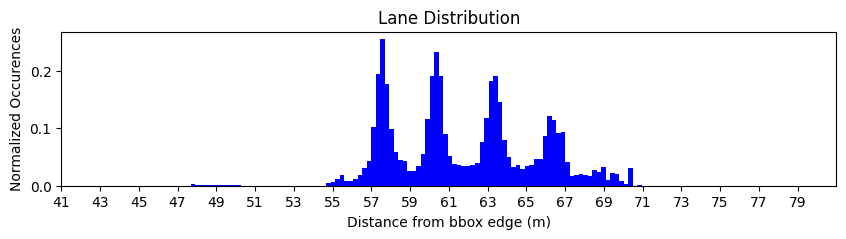

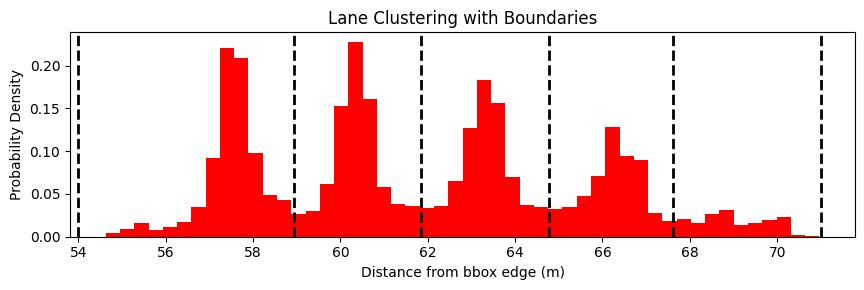

In [52]:
lane_info_13_12 = analysis_13_12.get_lane_info(flow_direction='up',nbins=100,valid_od_pairs=[(1,3)],avg_d_from_bbox_edge=False,custom_boundaries=False)

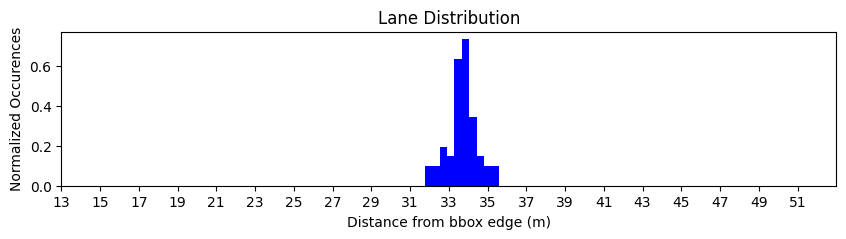

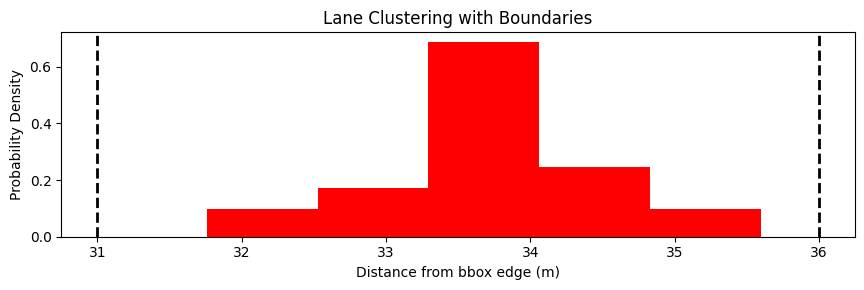

In [53]:
lane_info_43_42 = analysis_43_42.get_lane_info(flow_direction='left',nbins=10,valid_od_pairs=[(4,2)],avg_d_from_bbox_edge=True)

In [54]:
sorted_id_13_12 = analysis_13_12.get_sorted_id()
gaps_13_12 = analysis_13_12.get_gaps()
#==============================================
sorted_id_43_42 = analysis_43_42.get_sorted_id()
gaps_43_42 = analysis_43_42.get_gaps()

In [55]:
detector_positions_13_12 = (37.978572395827086, 23.734345599162733)
#---------------------------
flow_info_13_12 = analysis_13_12.get_flow_info(detector_positions_13_12)
flow_13_12,normalized_flow_13_12 = analysis_13_12.get_normalized_flow(threshold=10)
#============================
detector_positions_43_42 = (37.97876743300198, 23.734464957457945)
#----------------------------
flow_info_43_42 = analysis_43_42.get_flow_info(detector_positions_43_42)
flow_43_42,normalized_flow_43_42 = analysis_43_42.get_normalized_flow(threshold=15)

In [56]:
print(f'flow counts main: {sum(flow_13_12)}, max vehicles: {len(data_13_12.get('id'))}')
print(f'\nflow counts secondary: {sum(flow_43_42)}, max vehicles: {len(data_43_42.get('id'))}')

flow counts main: 1001, max vehicles: 1001

flow counts secondary: 78, max vehicles: 78


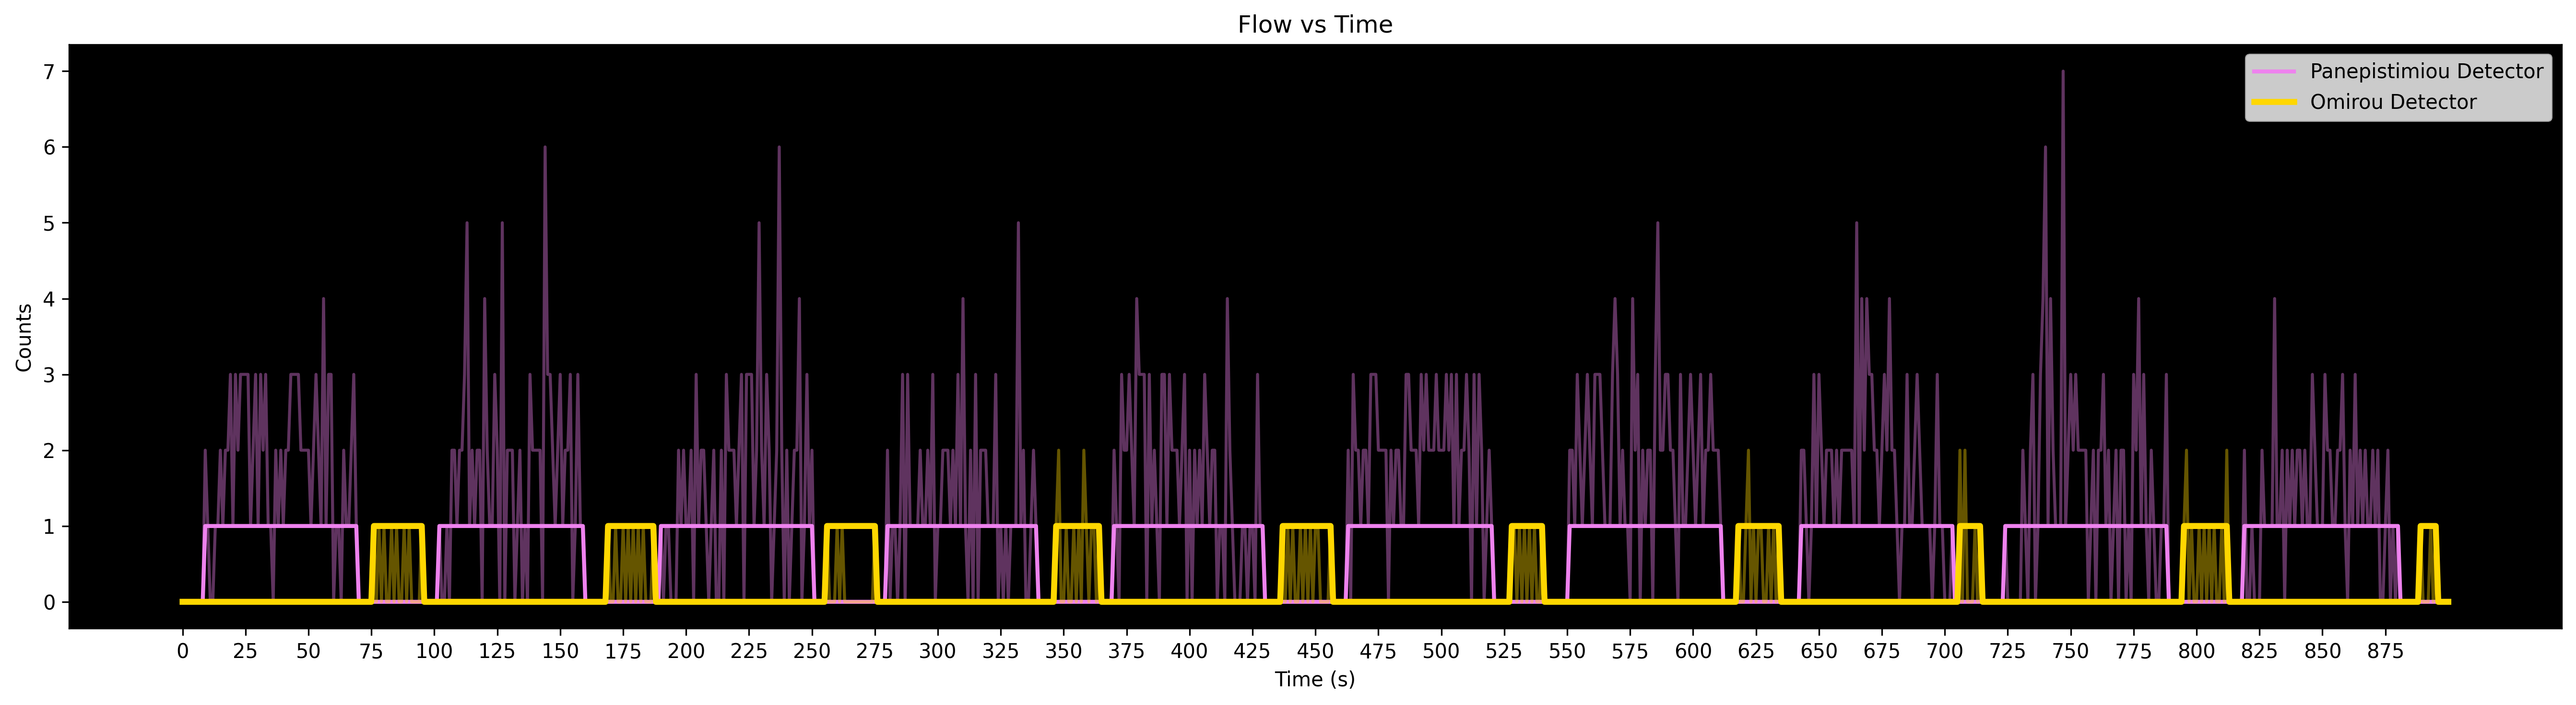

In [58]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(18,5),dpi=300)
ax.set_facecolor('black')
ax.set_title('Flow vs Time')

ax.plot(time_axis,normalized_flow_13_12,color='violet',alpha=1, label=f'{dataset_information.get('road')} Detector',linewidth=2)
ax.plot(time_axis,flow_13_12,color='violet',alpha=0.4)
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ax.plot(time_axis,normalized_flow_43_42,color='gold',alpha=1,label=f'{dataset_information.get('intersection')[dataset_information.get('intersection').index('-')+1:]} Detector',linewidth=3)
ax.plot(time_axis,flow_43_42,color='gold',alpha=0.4)

#ax.axhline(y=0,color='k',linewidth=2)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Counts')
#ax.set_yticks([0,1],['Detector OFF (0)','Detector ON (1)'])
ax.set_xticks(np.arange(0,time_axis[-1],25))
#ax.set_ylim(-0.1,2)


activate_zoom = False
#===================================
if activate_zoom:
    lowlim,highlim=800,825
    ax.set_xlim(lowlim,highlim)
    ax.set_xticks(np.arange(lowlim,highlim+period_flowcount,period_flowcount))
    analysis_13_12.get_cursed_id(lowlim,highlim)
#===================================

plt.legend()
plt.tight_layout()
plt.show(close=True)

In [59]:
tlp_13_12 = analysis_13_12.get_traffic_light_phases()
tlp_43_42 = analysis_43_42.get_traffic_light_phases()
#==================================================
cycles = analysis.get_traffic_light_cycles(tlp_13_12,tlp_43_42)

In [70]:
queue_info_13_12 = analysis_13_12.get_queue_info(speed_threshold=20, gap_threshold=15)
queue_info_43_42 = analysis_43_42.get_queue_info(speed_threshold=40, gap_threshold=15)

In [61]:
duration_green,duration_red,duration_phase,phase_error=[],[],[],[]
for p,phase in enumerate(tlp_13_12):

    duration_red.append(phase.get('Duration OFF'))
    duration_green.append(phase.get('Duration ON'))
    try:
        duration_phase.append(duration_green[-1]+duration_red[-1])
        phase_error.append(0.01*pow(pow(duration_green[-1],2)+pow(duration_red[-1],2),0.5))
    except TypeError:
        duration_phase.append(phase.get('Phase Duration'))
        phase_error.append(None)



print(f'Panepistimiou: green: {np.mean(duration_green):.0f} +- {np.std(duration_green):.0f}, red: {np.mean(duration_red[:-1]):.0f} +- {np.std(duration_red[:-1]):.0f}, phase: {np.mean(duration_phase[:-1]):.0f} +- {np.mean(phase_error[:-1]):.0f} ')

Panepistimiou: green: 61 +- 2, red: 29 +- 4, phase: 90 +- 1 


In [62]:
duration_green,duration_red,duration_phase,phase_error=[],[],[],[]
for p,phase in enumerate(tlp_43_42):

    duration_red.append(phase.get('Duration OFF'))
    duration_green.append(phase.get('Duration ON'))
    try:
        duration_phase.append(duration_green[-1]+duration_red[-1])
        phase_error.append(0.01*pow(pow(duration_green[-1],2)+pow(duration_red[-1],2),0.5))
    except TypeError:
        duration_phase.append(phase.get('Phase Duration'))
        phase_error.append(None)



print(f'Panepistimiou: green: {np.mean(duration_green[:-1]):.0f} +- {np.std(duration_green[:-1]):.0f}, red: {np.mean(duration_red[:-1]):.0f} +- {np.std(duration_red[:-1]):.0f}, phase: {np.mean(duration_phase[:-1]):.0f} +- {np.mean(phase_error[:-1]):.0f} ')

Panepistimiou: green: 17 +- 4, red: 73 +- 4, phase: 90 +- 1 
